<a href="https://colab.research.google.com/github/AMCCastillo/AI_IB/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 6.- Convolutional Neural Network**.

N1__2063509__Alessandra Morales Vázquez

N1__2055762__Alondra María Cruz Castillo

N1__2043031__Miranda Ortega Salinas

N1__1858323__Venancio Hernández Santiago

N1__1912265__Stephanie Fernanda Vera Treviño

**1. Load Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models
from keras.datasets import mnist
from random import randint

**2. Load Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**3. Data Preprocessing**

We perform the normalization of the pixel values in the imported dataset.

In [ ]:
# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

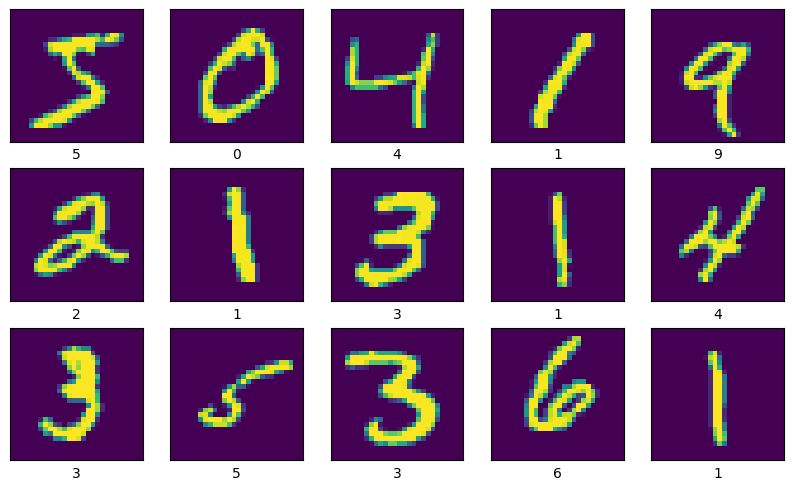

In [ ]:
#Show Dataset
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

**4. Model selection and training.**

In [ ]:
# Convolutional Base
model = models.Sequential()

# Convolution + Pooling Layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten + Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))   # OUTPUT LAYER

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - accuracy: 0.8838 - loss: 0.3709 - val_accuracy: 0.9850 - val_loss: 0.0503
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9851 - loss: 0.0517 - val_accuracy: 0.9882 - val_loss: 0.0443
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.9922 - loss: 0.0262 - val_accuracy: 0.9898 - val_loss: 0.0411
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9913 - val_loss: 0.0354
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9917 - val_loss: 0.0323
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 39ms/step - accuracy: 0.9955 - loss: 0.0120 - val_accuracy: 0.9925 - val_loss: 0.0365
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9964 -

**5. Model Testing**

313/313 - 3s - 9ms/step - accuracy: 0.9908 - loss: 0.0380

Test accuracy: 0.9908000230789185

MODEL PREDICTIONS:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


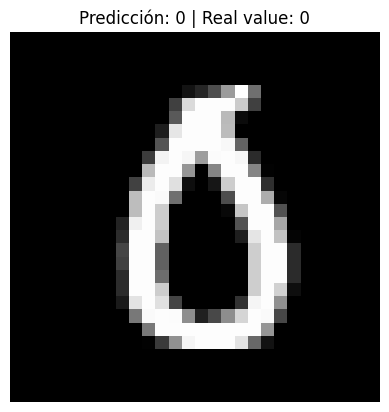

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


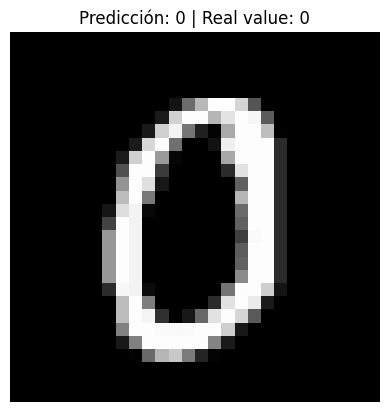

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


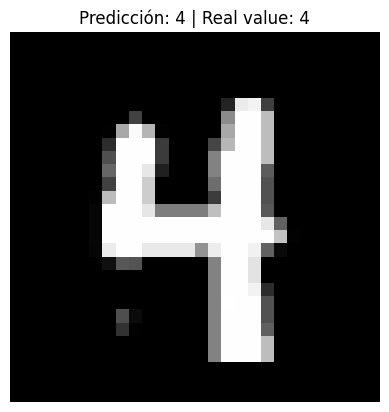

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


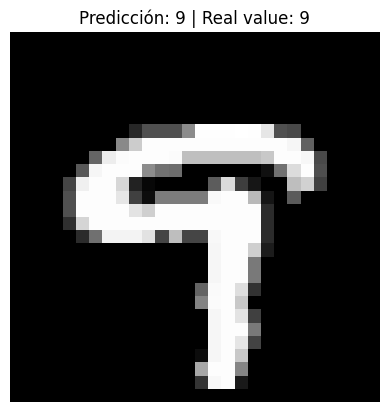

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


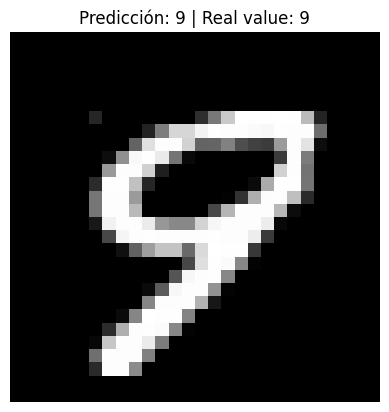

In [ ]:
# Evaluate model with test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# 5 DIFFERENT PREDICTIONS
print("\nMODEL PREDICTIONS:\n")

for i in range(5):
    idx = randint(0, len(test_images))
    sample = test_images[idx].reshape(1,28,28,1)
    prediction = model.predict(sample)
    predicted_label = np.argmax(prediction)

    plt.imshow(test_images[idx], cmap="gray")
    plt.title(f"Predicción: {predicted_label} | Real value: {test_labels[idx]}")
    plt.axis("off")
    plt.show()